# Sentiment Analysis on Movie Reviews using NLP

## Step 1: Install required libraries

In [2]:
!pip install tensorflow

## Step 2: Import Libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

## Step 3: Load IMDb Dataset

In [4]:
from tensorflow.keras.datasets import imdb

# Load dataset (keeping top 10,000 frequent words)
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

## Step 4: Preprocess Data (Padding)

In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 200  # maximum review length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

## Step 5: Build the Neural Network Model
Simple Architecture:
- Embedding Layer
- Flatten or GlobalAveragePooling 1D
- Dense hidden layer
- Output layer (sigmoid)

In [7]:
model = keras.Sequential([
    layers.Embedding(input_dim=num_words, output_dim=32),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

## Step 6: Compile Model

In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Step 7: Train the Model

In [9]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5546 - loss: 0.6898 - val_accuracy: 0.6482 - val_loss: 0.6714
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6894 - loss: 0.6604 - val_accuracy: 0.7766 - val_loss: 0.6184
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7752 - loss: 0.5982 - val_accuracy: 0.8012 - val_loss: 0.5390
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8022 - loss: 0.5189 - val_accuracy: 0.8264 - val_loss: 0.4644
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8423 - loss: 0.4397 - val_accuracy: 0.8432 - val_loss: 0.4067
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8588 - loss: 0.3785 - val_accuracy: 0.8520 - val_loss: 0.3719
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8753 - loss: 0.3374 - val_accuracy: 0.8596 - val_loss: 0.3455
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8866 - loss: 0.3048 - val_accuracy: 0.8584 - v

## Step 8: Evaluate the model

In [10]:
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8709 - loss: 0.3113
Test Loss: 0.3126971423625946, Test Accuracy: 0.8694800138473511


## Step 9: Visualize Training Progress

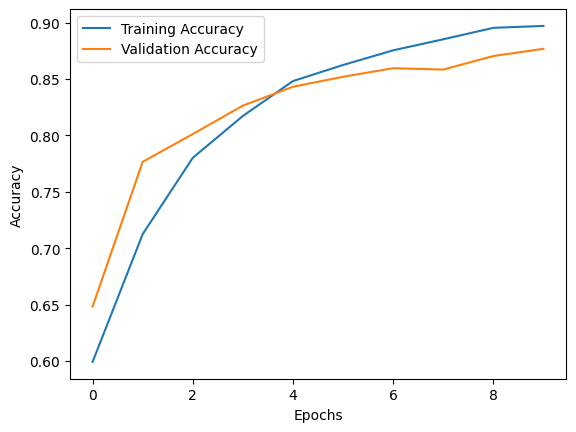

In [11]:
history_dict = history.history

plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Step 10: Save Model

In [13]:
model.save("sentiment_model.keras")